In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter

from src.utils.util import *
from src.utils.generate_boundary_condition import *
from src.utils.generate_operating_condition import *
from src.utils.generate_output import *

In [2]:
def boundary_condition_main_func(dimension_setting):
    '''boundary condition 생성하기'''
    create_save_directory()
    no_obstacle_data,yes_obstacle_data=load_data()
    generate_no_obstacle_boundary_data(no_obstacle_data,dimension_setting,"velocity")
    generate_yes_obstacle_boundary_data(yes_obstacle_data,dimension_setting)

boundary_condition_main_func([120,60,64])

100%|██████████| 108/108 [20:19<00:00, 11.29s/it]


<Figure size 432x288 with 0 Axes>

## 2. Driving condition 생성

In [2]:
char2idx,idx2char=generate_no_obstacle_operating_data()
char2idx,idx2char=generate_yes_obstacle_operating_data()

In [3]:
char2idx

{'<PAD>': 0,
 '<wall_temperature>': 1,
 '<Angle>': 2,
 '<inlet_velocity>': 3,
 '<inlet_temperature>': 4,
 '<NONE>': 5,
 '10': 6,
 '50': 7,
 '1.91': 8,
 '30': 9,
 '0': 10,
 '2.38': 11,
 '70': 12,
 '1.43': 13}

In [5]:
tt=np.load('dataset/processed/input/text_input/no_obstacle/operating_condition.npy')
tt[0]

array([ 3, 13,  4,  6,  1,  6,  2,  8,  5, 12])

In [6]:
tt

array([[ 3, 13,  4, ...,  8,  5, 12],
       [ 3, 13,  4, ...,  8,  5, 12],
       [ 3, 13,  4, ...,  8,  5, 12],
       ...,
       [ 3, 18,  4, ..., 11,  5, 12],
       [ 3, 18,  4, ..., 11,  5, 12],
       [ 3, 18,  4, ..., 11,  5, 12]])

## 3. Label 데이터 생성

In [2]:
def label_data_main_func(dimension_setting):
    '''label 데이터 생성하기'''
    no_obstacle_data,yes_obstacle_data=load_data()
    generate_no_obstacle_output(no_obstacle_data,dimension_setting,"temperature")
    # generate_yes_obstacle_output(yes_obstacle_data,dimension_setting,"temperature")

label_data_main_func([120,60,64])

100%|██████████| 315/315 [00:32<00:00,  9.82it/s]


## 4. 데이터확인

In [4]:
input_path="./dataset/processed/input/"
output_path="./dataset/processed/output/"
boundary_no_obs_path=input_path+"cnn_input/no_obstacle/"
label_no_obs_path=output_path+"no_obstacle/"

In [5]:
df = pd.read_csv("dataset/dataframe/yes_obstacle/0.csv")
boundary_data=np.load(boundary_no_obs_path+'boundary_condition.npy')
label_data=np.load(label_no_obs_path+'temperature_label.npy')

In [9]:
label_data[0].shape

(120, 60, 64)

9.99999390000005
49.2251526


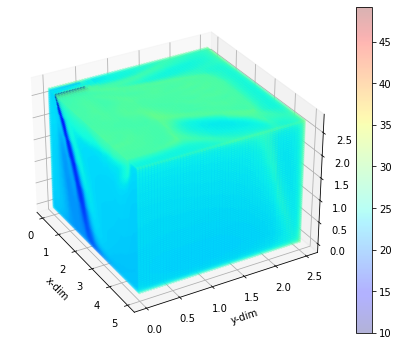

In [12]:
min_temp = np.min(label_data[2])
print(min_temp)
max_temp = np.max(label_data[2])
print(max_temp)
plotting(df,label_data[1],[8,6,5,0.3,min_temp,max_temp,30,330])

In [5]:
# 공간정보 데이터
boundary_data_s = []
for i in boundary_data:
    i=i.reshape(120,60,64,1)
    boundary_data_s.append(i)
boundary_data = np.array(boundary_data_s).astype("float64")
boundary_data.shape

(108, 120, 60, 64, 1)